# Linear Regression

🎯 In this exercise, you will model the performance of a NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [2]:
# YOUR CODE HERE
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('NBA.csv')

In [18]:
df.head(5)

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


In [20]:
df.shape

(4000, 6)

ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define the feature set and target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` the target.

In [21]:
# YOUR CODE HERE
X = df[['mp']]
y = df['win_rating']

In [22]:
print(X.shape)
y.shape

(4000, 1)


(4000,)

👇 In a scatter plot ([doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the rating and the minutes played.

In [23]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

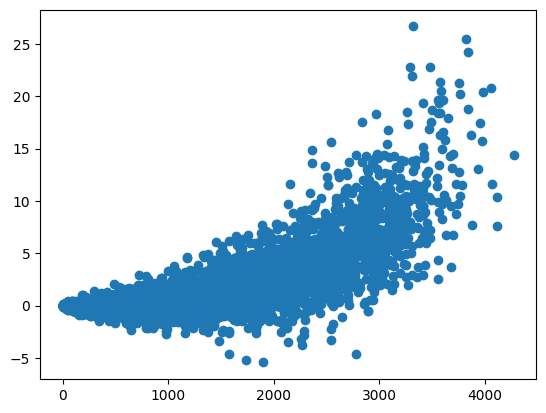

In [24]:
plt.scatter(X, y)

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting the player performance rating from minutes played. Save the raw output of the cross validation under a new variable `cv_results`.

In [26]:
# YOUR CODE HERE
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

cv_results = cross_validate(model, X, y, cv=5)

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [34]:
# YOUR CODE HERE
min_score = cv_results['test_score'].min()

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [35]:
# YOUR CODE HERE
max_score = cv_results['test_score'].max()

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [36]:
# YOUR CODE HERE
mean_score = cv_results['test_score'].mean()

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [37]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data/05-ML/01-Fundamentals-of-Machine-Learning/linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.23s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as K folds increases from 2 until 20.

In [40]:
# YOUR CODE HERE
K = []
total_time = []
score = []

for k in range(2,21):
    cross_val_results = cross_validate(model, X, y, cv=k)
    total_time.append(sum(cross_val_results['fit_time'])+sum(cross_val_results['score_time']))
    K.append(k)
    score.append(cross_val_results['test_score'].mean())

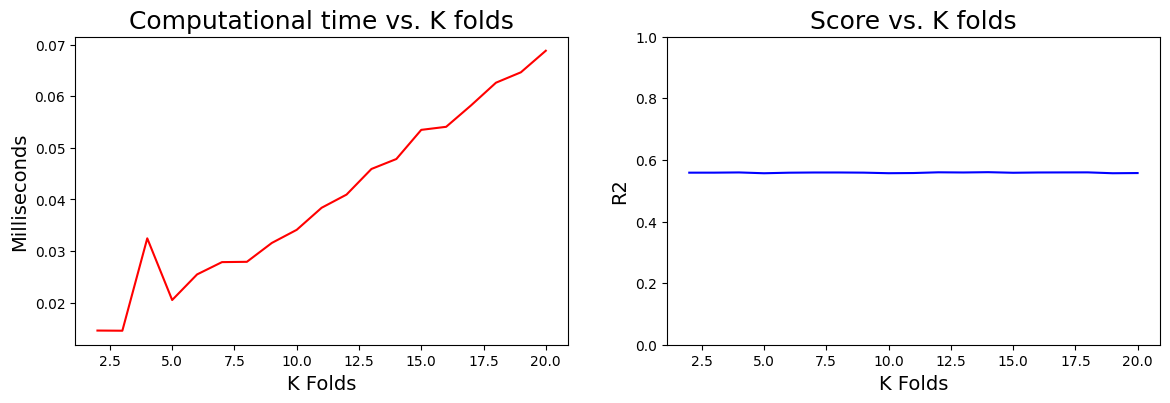

In [41]:
# YOUR CODE HERE
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(K, total_time, color = "red")
plt.xlabel("K Folds", fontsize = 14)
plt.ylabel("Milliseconds", fontsize = 14)
plt.title("Computational time vs. K folds", fontsize = 18)

plt.subplot(1,2,2)
plt.plot(K, score, color = "blue")
plt.xlabel("K Folds", fontsize = 14)
plt.ylabel("R2", fontsize = 14)
plt.ylim(0,1)
plt.title("Score vs. K folds", fontsize = 18);

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict!). Save the trained model under the variable `model`.

In [42]:
# YOUR CODE HERE
model = LinearRegression()

model.fit(X, y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [43]:
# YOUR CODE HERE
slope = model.coef_[0]
slope

0.002602579938640193

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [45]:
# YOUR CODE HERE
intercept = model.intercept_
intercept

-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [46]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data/05-ML/01-Fundamentals-of-Machine-Learning/linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.22s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted price in a variable called `prediction`.

In [48]:
# YOUR CODE HERE
new_data_point = pd.DataFrame.from_dict({'mp': [1000]})

prediction = model.predict(new_data_point)[0]
prediction

1.0562050014762487

### ☑️ Test your code

In [49]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data/05-ML/01-Fundamentals-of-Machine-Learning/linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.23s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the model with more features

Your friend who enjoys NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

In [50]:
# YOUR CODE HERE
import seaborn as sns

<AxesSubplot:xlabel='pacing', ylabel='win_rating'>

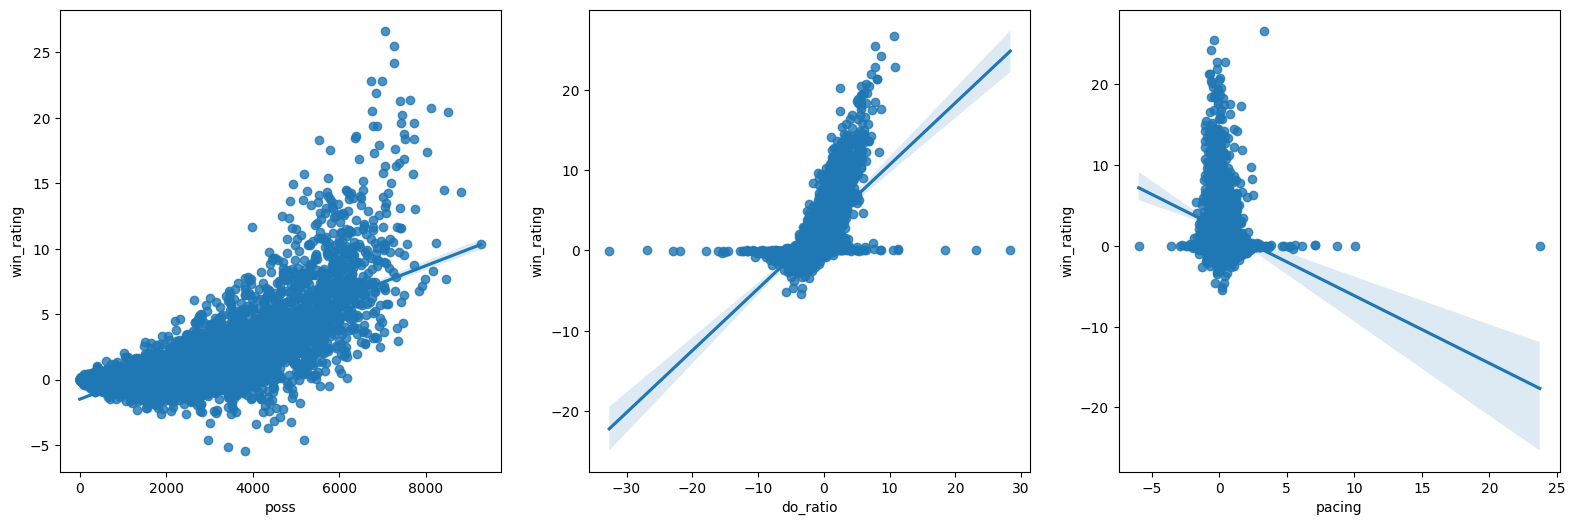

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,6))

plt.subplots_adjust(left=0.5, right=2)

sns.regplot(data=df, x='poss', y='win_rating', ax=axes[0])
sns.regplot(data=df, x='do_ratio', y='win_rating', ax=axes[1])
sns.regplot(data=df, x='pacing', y='win_rating', ax=axes[2])

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [55]:
# YOUR CODE HERE
X_new = df[['mp','do_ratio']]

❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [60]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score

mean_2_feat_score = cross_val_score(model, X_new,y, cv=5).mean()

mean_2_feat_score

0.6317728310765246

### ☑️ Test your code

In [61]:
from nbresult import ChallengeResult

result = ChallengeResult('improved_score',
                         improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data/05-ML/01-Fundamentals-of-Machine-Learning/linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.22s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** to your $R^2$ 👏

Congrats you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁